### Assignment 1:  𝑒𝑥𝑝𝑒𝑛𝑑𝑖𝑡𝑢𝑟𝑒=873+0.0012𝑎𝑛𝑛𝑢𝑎𝑙_𝑖𝑛𝑐𝑜𝑚𝑒+0.00002𝑎𝑛𝑛𝑢𝑎𝑙_𝑖𝑛𝑐𝑜𝑚𝑒2−223.57ℎ𝑎𝑣𝑒_𝑘𝑖𝑑𝑠

- The constant term of the equation is 873; it takes bias from residuals to itself. It is called bias because the constant terms make the residuals zero on average, and also it ahould mmake the 𝔼(𝜖)=0.
- The coeificient of variable have_kids, -223.57, refers that on average families with children spend \$223.57 less than families without children.
- The coeficients for annual_income are very small, but assuming that their values are significant we can say an increase of \\$1000 on annual_income makes increase expenditure by \$1.2, and because there is a quadratic relation between expenditue and annual_income there is also an increse of  0.00002/1000000= \\$2.

To compare the relation between the annual reacreation expenditure and the annual income for the families with children and without children we show their graphs below:

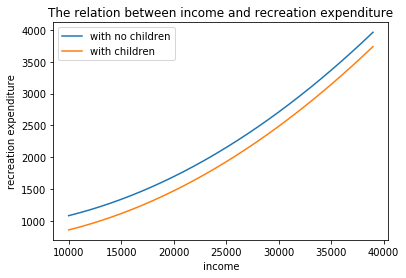

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# X represents annual income
X = np.arange(10000, 40000, 1000)
# Y represents annual expenditure on recreation
# for families with no children
Y = 873 + 0.0012*X + 0.000002*(X**2)
# Y_kids represents annual expenditure on recreation
# for families with children
Y_kids = (873 - 223.57) + 0.0012*X + 0.000002*(X**2)


plt1 = plt.plot(X, Y, label="with no children")
plt2 = plt.plot(X, Y_kids, label="with children")
plt.xlabel("income")
plt.ylabel("recreation expenditure")
plt.title("The relation between income and recreation expenditure")
plt.legend()
plt.show()

### Assignment 2: Weather model

In [12]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
weather_df = pd.read_sql_query('select * from weatherinszeged',con=engine)

engine.dispose()

weather_df[['apparenttemperature', 'temperature', 'humidity', 'windspeed']].head(10)

,apparenttemperature,temperature,humidity,windspeed
0,7.388889,9.472222,0.89,14.1197
1,7.227778,9.355556,0.86,14.2646
2,9.377778,9.377778,0.89,3.9284
3,5.944444,8.288889,0.83,14.1036
4,6.977778,8.755556,0.83,11.0446
5,7.111111,9.222222,0.85,13.9587
6,5.522222,7.733333,0.95,12.3648
7,6.527778,8.772222,0.89,14.1519
8,10.822222,10.822222,0.82,11.3183
9,13.772222,13.772222,0.72,12.5258


In [13]:
Y = weather_df['apparenttemperature'] - weather_df['temperature']
X = weather_df[['humidity','windspeed']]
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                 1.949e+04
Date:                Sat, 16 Nov 2019   Prob (F-statistic):               0.00
Time:                        10:24:46   Log-Likelihood:            -1.7046e+05
No. Observations:               96453   AIC:                         3.409e+05
Df Residuals:                   96450   BIC:                         3.409e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4381      0.021    115.948      0.000       2.397       2.479
humidity      -3.0292      0.024   -126.479      0.000      -3.076      -2.982
windspeed     -0.1193      0.001   -176.164      0.000      -0.121      -0.118
==============================================================================
Omnibus:                     3935.747   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4613.311
Skew:                          -0.478   Prob(JB):                         0.00
Kurtosis:                       3.484   Cond. No.                         88.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- The constant term of the equation is 2.4381 that takes bias from residuals to itself. 
- The p_valuse are less then 0.05 that means the coifecients are significantly significant. 
- 1 point increase in the humidity and windspeed results in 3.0292 and 0.1193 point decrease in the target respectively.

### Assignment 3: House price model

In [14]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
hprice = pd.read_sql_query('select * from houseprices',con=engine)

engine.dispose()

In [15]:
hprice = pd.concat([hprice,pd.get_dummies(hprice.street, drop_first=True)], axis=1)

dummy_columns = list(pd.get_dummies(hprice.street, drop_first=True).columns)

hprice[['overallqual', 'overallcond', 'grlivarea'] + dummy_columns].head()

,overallqual,overallcond,grlivarea,Pave
0,7,5,1710,1
1,6,8,1262,1
2,7,5,1786,1
3,7,5,1717,1
4,8,5,2198,1


In [16]:
X = hprice[['overallqual', 'overallcond', 'grlivarea'] + dummy_columns]
Y = hprice['saleprice']

X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     909.3
Date:                Sat, 16 Nov 2019   Prob (F-statistic):               0.00
Time:                        10:43:35   Log-Likelihood:                -17630.
No. Observations:                1460   AIC:                         3.527e+04
Df Residuals:                    1455   BIC:                         3.530e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.496e+04   1.85e+04     -5.119      0.000   -1.31e+05   -5.86e+04
overallqual  3.289e+04   1002.200     32.822      0.000    3.09e+04    3.49e+04
overallcond   332.0004   1006.368      0.330      0.742   -1642.088    2306.088
grlivarea      55.9093      2.633     21.237      0.000      50.745      61.073
Pave        -1.138e+04   1.74e+04     -0.652      0.514   -4.56e+04    2.28e+04
==============================================================================
Omnibus:                      341.836   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8745.441
Skew:                           0.467   Prob(JB):                         0.00
Kurtosis:                      14.954   Cond. No.                     3.58e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Significant variables: overallqual and grilvarea (p_values < 0.05)
- Insignificant variables: overallcond and the categorical dummy variable, Pave.
- 1 point increase in overallqual results in \$32890 increase in sale price.
- 1 point increase in grlivarea results in \$55.91 increase in sale price.

Excluding insignificant variables:


In [18]:
X = hprice[['overallqual', 'grlivarea']]
Y = hprice['saleprice']

X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     1820.
Date:                Sat, 16 Nov 2019   Prob (F-statistic):               0.00
Time:                        10:55:48   Log-Likelihood:                -17630.
No. Observations:                1460   AIC:                         3.527e+04
Df Residuals:                    1457   BIC:                         3.528e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.041e+05   5045.372    -20.631      0.000   -1.14e+05   -9.42e+04
overallqual  3.285e+04    999.198     32.875      0.000    3.09e+04    3.48e+04
grlivarea      55.8622      2.630     21.242      0.000      50.704      61.021
==============================================================================
Omnibus:                      341.985   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8725.150
Skew:                           0.469   Prob(JB):                         0.00
Kurtosis:                      14.939   Cond. No.                     7.35e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The results confirm that the variables, overallqual and grlivarea, are significantly significant, and these two are the most effective factors on house price.